In [7]:
import pandas as pd
csv_Data="""
Month,Store,Sales
Jan,Store A,12000
Jan,Store B,15000
Feb,Store A,18000
Feb,Store B,17000
Mar,Store A,16000
Mar,Store B,19000"""
with open('sales_data.csv','w')as f:
  f.write(csv_Data)
df=pd.read_csv('sales_data.csv')
print(df)


  Month    Store  Sales
0   Jan  Store A  12000
1   Jan  Store B  15000
2   Feb  Store A  18000
3   Feb  Store B  17000
4   Mar  Store A  16000
5   Mar  Store B  19000


In [9]:
total_sales=df.groupby('Store')['Sales'].sum()
print(total_sales)
print(f'highest_total_sales is:{total_sales.idxmax()}')


Store
Store A    46000
Store B    51000
Name: Sales, dtype: int64
highest_total_sales is:Store B


In [13]:
total_sales_month=df.groupby('Month')['Sales'].sum()
print(total_sales_month.sort_values())

Month
Jan    27000
Feb    35000
Mar    35000
Name: Sales, dtype: int64


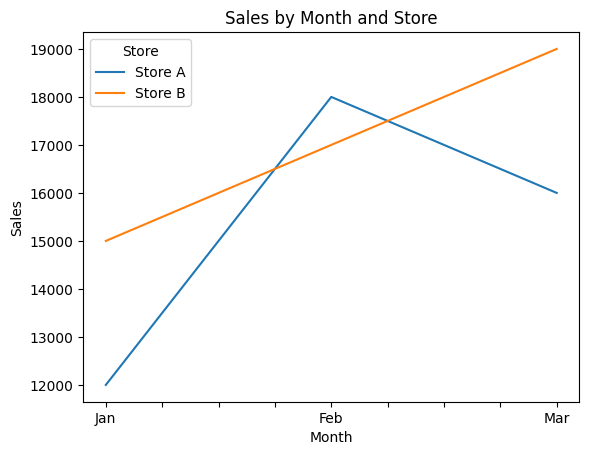

In [35]:
import matplotlib.pyplot as plt
pivot_df=df.pivot(index='Month',columns='Store',values='Sales')
pivot_df=pivot_df.reindex(['Jan','Feb','Mar'])
pivot_df.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month and Store')
plt.show()


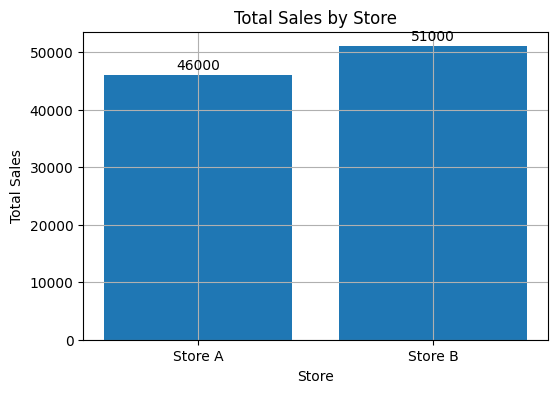

In [54]:
plt.figure(figsize=(6,4))
bars=plt.bar(total_sales.index,total_sales.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height + 550, f'{height}', ha='center', va='bottom')

plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.grid(True)
plt.savefig('sales_chart.png')
plt.show()
